# Lab 8: Visualization of Graph Data

**Dataset:** Simulated city road network  
**Description:**  
- Nodes represent intersections (A, B, C, D).  
- Edges represent roads, with weights as distances (km).  
- 4 nodes, 4 edges.

**Features used:**  
- Node label (intersection name)  
- Edge weight (distance in km)

**Observation:**  
- The network forms a small loop with a shortcut, allowing multiple routes between intersections.

## 1. Directed Graph Visualization

- Each edge has a direction (one-way road).
- Arrowheads indicate direction.
- Edge labels show distances (km).

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import time
import networkx as nx


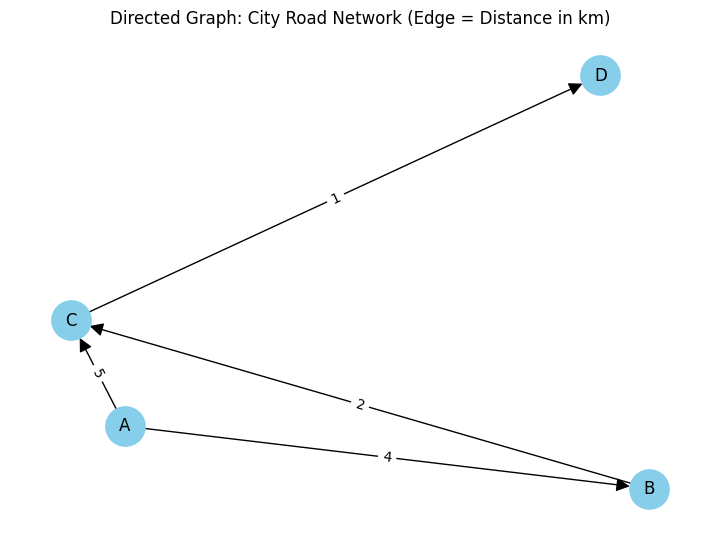

In [3]:
# Directed graph: one-way roads with distances
DG = nx.DiGraph()
DG.add_weighted_edges_from([
    ('A', 'B', 4),
    ('B', 'C', 2),
    ('C', 'D', 1),
    ('A', 'C', 5)
])

pos = nx.spring_layout(DG, seed=42)
edge_labels = nx.get_edge_attributes(DG, 'weight')

plt.figure(figsize=(7,5))
nx.draw(DG, pos, with_labels=True, node_color='skyblue', node_size=800, arrows=True, arrowstyle='-|>', arrowsize=20)
nx.draw_networkx_edge_labels(DG, pos, edge_labels=edge_labels)
plt.title("Directed Graph: City Road Network (Edge = Distance in km)")
plt.show()

**Observation:**  
- All roads are one-way. The shortest direct route from A to D is via C.

## 2. Undirected Graph Visualization

- All roads are now two-way.
- Edge labels show distances (km).
- Node and edge styles are different from the directed version.

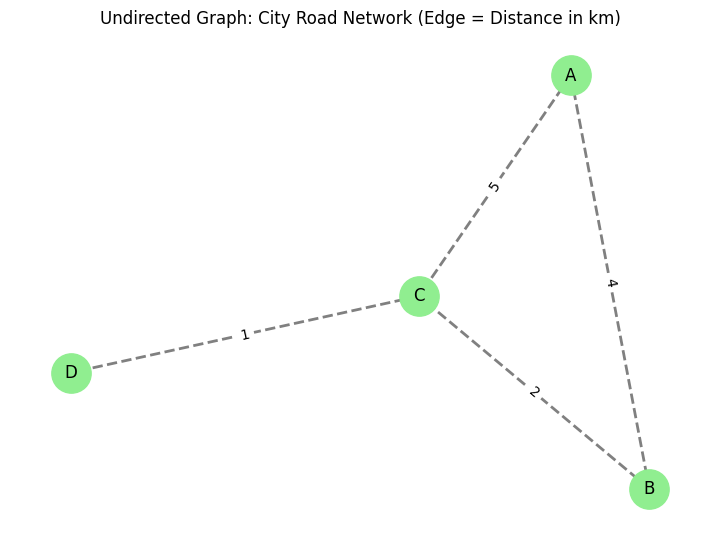

In [4]:
UG = nx.Graph()
UG.add_weighted_edges_from([
    ('A', 'B', 4),
    ('B', 'C', 2),
    ('C', 'D', 1),
    ('A', 'C', 5)
])

pos = nx.spring_layout(UG, seed=42)
edge_labels = nx.get_edge_attributes(UG, 'weight')

plt.figure(figsize=(7,5))
nx.draw(UG, pos, with_labels=True, node_color='lightgreen', node_size=800, edge_color='gray', width=2, style='dashed')
nx.draw_networkx_edge_labels(UG, pos, edge_labels=edge_labels)
plt.title("Undirected Graph: City Road Network (Edge = Distance in km)")
plt.show()

**Observation:**  
- Roads can be traveled in both directions, increasing route flexibility.

## 3. Weighted Graph Visualization

- Edge thickness and color intensity indicate road distance.
- Labels show exact distances (km).

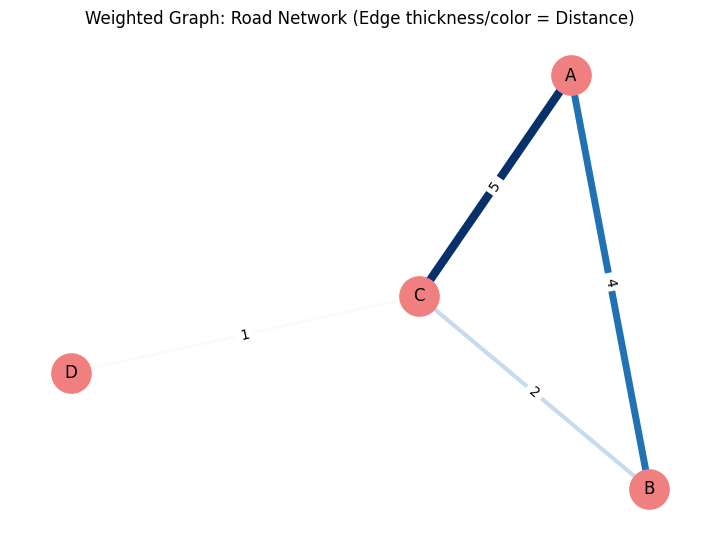

In [7]:
WG = nx.Graph()
WG.add_weighted_edges_from([
    ('A', 'B', 4),
    ('B', 'C', 2),
    ('C', 'D', 1),
    ('A', 'C', 5)
])

pos = nx.spring_layout(WG, seed=42)
edge_labels = nx.get_edge_attributes(WG, 'weight')
weights = np.array([WG[u][v]['weight'] for u, v in WG.edges()])
max_weight = weights.max()
min_weight = weights.min()
# Normalize for color and width
edge_colors = plt.cm.Blues((weights - min_weight) / (max_weight - min_weight + 1e-6))
edge_widths = 2 + 4 * (weights - min_weight) / (max_weight - min_weight + 1e-6)

plt.figure(figsize=(7,5))
nx.draw(WG, pos, with_labels=True, node_color='lightcoral', node_size=800, width=edge_widths, edge_color=edge_colors)
nx.draw_networkx_edge_labels(WG, pos, edge_labels=edge_labels)
plt.title("Weighted Graph: Road Network (Edge thickness/color = Distance)")
plt.show()

**Observation:**  
- The thickest, darkest edge (A–C) is the longest road; the thinnest, lightest (C–D) is the shortest.

## 4. Kruskal’s Minimum Spanning Tree (MST)

- The MST connects all intersections with the minimum total road length.
- At each step, the shortest available edge is added, avoiding cycles.

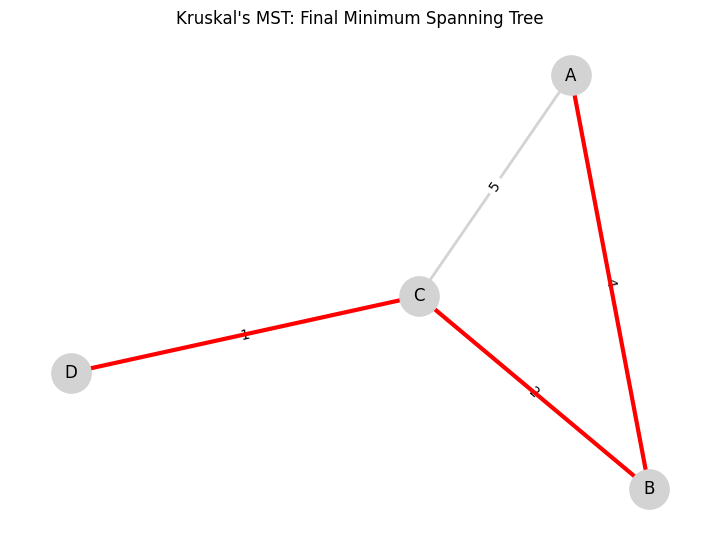

In [8]:
# Build the weighted graph
G = nx.Graph()
G.add_weighted_edges_from([
    ('A', 'B', 4),
    ('B', 'C', 2),
    ('C', 'D', 1),
    ('A', 'C', 5)
])

# Kruskal's algorithm using NetworkX
mst = nx.minimum_spanning_tree(G, algorithm='kruskal')
mst_edges = list(mst.edges())

# Visualize the original graph
pos = nx.spring_layout(G, seed=42)
edge_labels = nx.get_edge_attributes(G, 'weight')

plt.figure(figsize=(7,5))
nx.draw(G, pos, with_labels=True, node_color='lightgray', node_size=800, edge_color='lightgray', width=2)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
nx.draw_networkx_edges(G, pos, edgelist=mst_edges, edge_color='red', width=3)
plt.title("Kruskal's MST: Final Minimum Spanning Tree")
plt.show()

**Observation:**  
- The thickest, darkest edge (A–C) is the longest road; the thinnest, lightest (C–D) is the shortest.